# This is a simple neural network model for XOR operation

The program creates a neural network that simulates the exclusive OR function with two inputs and one output and 4 hidden layers which will help with the predictions.

We will use numpy for all the computations

In [75]:
import numpy as np

The code below is a function definition of the sigmoid function,an activation function, which is the type of non-linearity chosen for this neural net.  A sigmoid function maps any value to a value between 0 and 1. We use it to convert numbers to probabilities. 
The code also performs derivative upon the input if deriv=True. This will be used later in the error back propogation step.

In [76]:
def nonlin(x, deriv=False): 
    if(deriv==True):
        return (x*(1-x))        # returns derivative of input x
    
    return 1/(1+np.exp(-x))     #returns exponential value of input x 

The code below is to create an input matrix. it is a 2x4 matrix

In [77]:
X = np.array([[0,0],  
            [0,1],
            [1,0],
            [1,1]])

the code below is the output of the XOR function for the input matrix above

In [78]:
y = np.array([[0],
             [1],
             [1],
             [0]])

The numbers will be randomly distributed in exactly the same way everytime we train.

In [79]:
np.random.seed(1)

# creating random weights for synapses

The code below generates random weight matrix for this neural network. The weights matrix are called synapses.There is 3 layers (input, hidden layer and output). So we need two matrixes(synapses), one before the hidden layer and one after which is connected to the output. The first synapse will be multiplied with the input matrix and then we will run it through the sigmoid function.

This matrix is randomly generated in python and is multiplied with the input . Its dimension is (2,4) because we have 2 inputs and 4 hidden layers. l0 is the input and l2 will be the output. l1 will hold the multiplication value of l0 and syn1(input weights) which will then be passed through the sigmoid function.

In [80]:
syn1 = np.random.random((2,4))  # 2x4 matrix of weights ((2 inputs) x 4 nodes in the hidden layer
syn2 = np.random.random((4,1))  # 4x1 matrix of weights. (4 nodes x 1 output)

syn2 will be the synapse after the hidden layer. It is of the size 4x1 because we have 4 hidden layers and 1 output. After the sigmoid function is used on l1, l1 will be multiplied with syn1 to generate an output matrix of size 4x1.

The Main predicition begins below. We will have 60000 iterations, although the number can be increased to get better accuracy, we will keep it at 60000 to get faster results.

# Forward Network

As explained above l0 contains the input.


l1 contains the multiplication of syn1 with the input which is then passed through the activation function (sigmoid fucntion). There, the activation function is applied to each element of the matrix resulted from l0*syn1

l2 will have product of l1 and syn2 (weights after the hidden layer) which will be again passed through the activation function.

Our model should look something like this

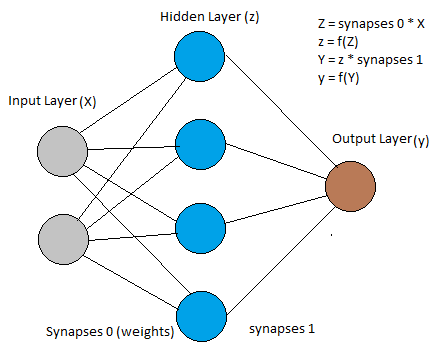

In [81]:
from IPython.display import Image
Image("F:/Tech fundamentals/Project/Submittals/NN.png")

# Back Propogation

we first calculate the cost(error). Cost is the difference in the predicted value and the actual output value. Our job here is to minimize the cost function. We can only do that by changing the value of the weights in the synapses.

We need to know how much do the weights in the synapses affect the cost and in which direction. Do they increase or decrease the error. For that we will need the derivative function. If the derivative of the output is positive, then the cost is going up(positive slope) and if the derivative is negative, then the cost is going down(negative slope). This process is called Gradient Descent

We need to find out the change in error to the change in weights. (this is the chain rule of derivation where you take the outer derivative and multiply it with the inner derivative). because of this, we will take the derivative of the output and multiply this with the error to form a new matrix called l2_delta. This is where we are training the model to make better predictions.
We will update syn2 with l2_delta

we multiply the back propogating error with the Transpose of the activity in each synapse (synapses 2). We will treat this as l1_error. This is to update our synapses 1. We take the derivate of the input of the hidden layer(l1) and multiply it with l1_error to get l1_delta.

Eventually, we will update both the synapses , syn1 with product of l0 transpose and l1_delta and syn2 with product of l1 transpose and l2_delta. This will be done for 60000 iterations

In [82]:
for j in range(60000):  
    
    # Calculate forward through the network.
    l0 = X
    l1 = nonlin(np.dot(l0, syn1))
    l2 = nonlin(np.dot(l1, syn2))
    
    # Back propagation of errors using the chain rule. 
    l2_error = y - l2
    if(j % 10000) == 0:   # Only print the error every 10000 steps, to save time and limit the amount of output. 
        print ("Error: " + str(np.mean(np.abs(l2_error))))
        
    l2_delta = l2_error*nonlin(l2, deriv=True)    # back propogating error
    
    l1_error = l2_delta.dot(syn2.T)
    
    l1_delta = l1_error * nonlin(l1,deriv=True)
    
    #update weights
    syn2 += l1.T.dot(l2_delta)
    syn1 += l0.T.dot(l1_delta)
    
print ("Output after training")
print (l2)
    

Error: 0.499319690739
Error: 0.0165638769582
Error: 0.0104669481327
Error: 0.008303911676
Error: 0.00711919097558
Error: 0.00634201641317
Output after training
[[ 0.00554722]
 [ 0.99404972]
 [ 0.99420492]
 [ 0.0058294 ]]


# In the output, We can clearly see that at the beginning the error is a lot, but once it starts to train the model over further iterations, the error reduces. The final output after training is very close to the original output.

sources : Sirajology simple neural network , lumiverse.io/video , 